In [1]:
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [16]:
# Generate a synthetic dataset
date_range = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
np.random.seed(0)
stock_prices = np.cumprod(1 + np.random.randn(len(date_range)) * 0.02)
data = pd.DataFrame({'ds': date_range, 'y': stock_prices})
data.loc[200, 'y'] = 1.5  # Introduce an outlier
data.loc[400, 'y'] = 0.5  # Introduce another outlier

In [17]:
# Create and fit the Prophet model
model = Prophet()
model.fit(data)

16:33:52 - cmdstanpy - INFO - Chain [1] start processing
16:33:53 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Generate future dates for forecasting
future_dates = model.make_future_dataframe(periods=365)  # Forecasting for the next 365 days

In [19]:
# Make predictions
forecast = model.predict(future_dates)

/usr/local/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


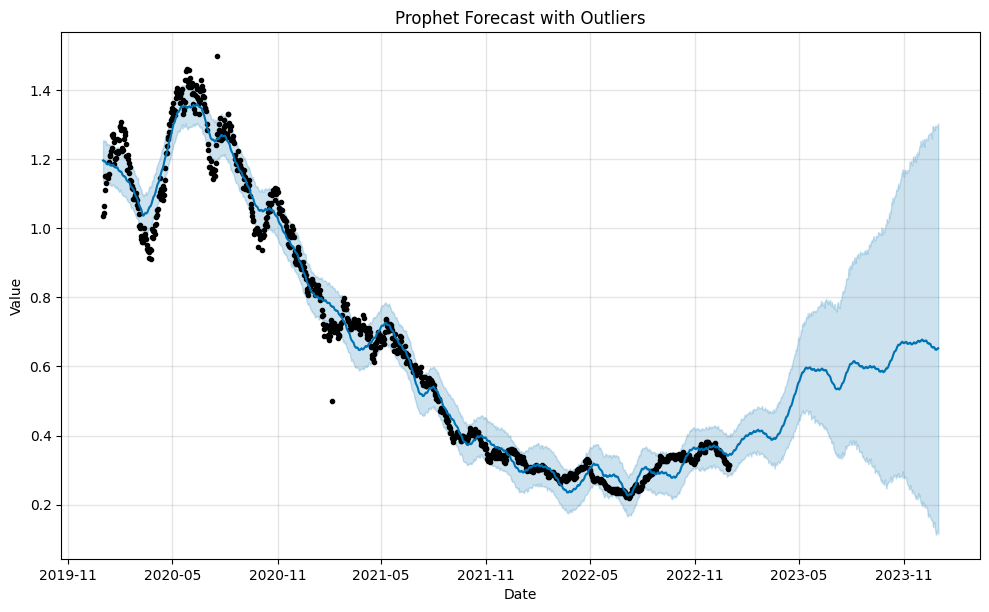

In [20]:
# Plot the forecast
fig = model.plot(forecast)
plt.title("Prophet Forecast with Outliers")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

/usr/local/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

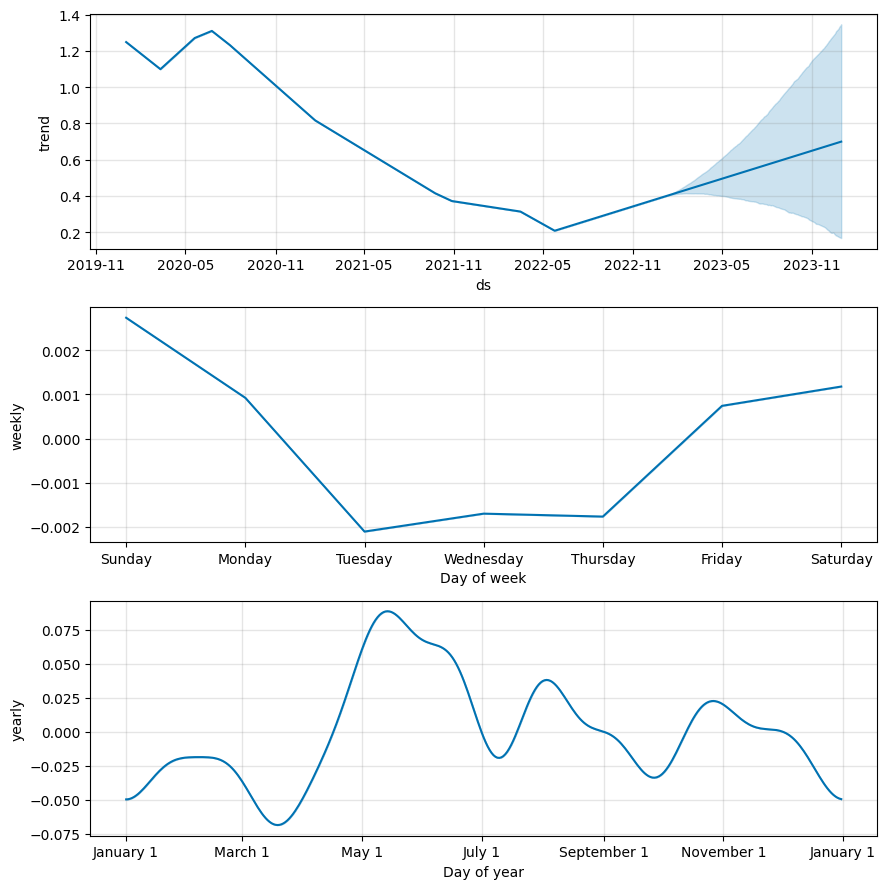

In [21]:
# Plot the components of the forecast (trend, yearly, and weekly)
fig = model.plot_components(forecast)
plt.show()